# Desafio do Módulo 1

In [1]:
from ConectionPostgre import ConectionPostgre
import pandas as pd
import numpy as np
import locale
from datetime import datetime
locale.setlocale(locale.LC_ALL, '')

from matplotlib import pyplot as plt
from matplotlib.dates import DateLocator
from matplotlib.dates import DateFormatter
from matplotlib.dates import AutoDateLocator
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

### Questão-01: Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico de colunas com a média de salário (ConvertedComp) por formação (EdLevel), filtrando os dados do Brasil, como fica o gráfico? 

In [2]:
df = pd.read_csv('data/survey_results_public.csv')
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [5]:
# Criando cópia do df e alterando os nan para string NA para poder considera-los no GrouBy
df_q1 = df.copy()
df_q1['EdLevel'].fillna('NA', inplace=True)

In [6]:
df_q1 = pd.DataFrame(df_q1.loc[df['Country'] == 'Brazil'].groupby('EdLevel')['ConvertedComp']
                     .mean()).reset_index().sort_values(by=['ConvertedComp'], ascending=False)
df_q1

,EdLevel,ConvertedComp
4,NA,86592.000000
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",53109.633508
5,"Other doctoral degree (Ph.D, Ed.D., etc.)",52615.047619
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",34671.927273
0,Associate degree,20185.389831
7,"Professional degree (JD, MD, etc.)",20146.333333
9,Some college/university study without earning ...,19134.430233
8,"Secondary school (e.g. American high school, G...",15782.693878
6,Primary/elementary school,15081.600000
2,I never completed any formal education,13350.857143


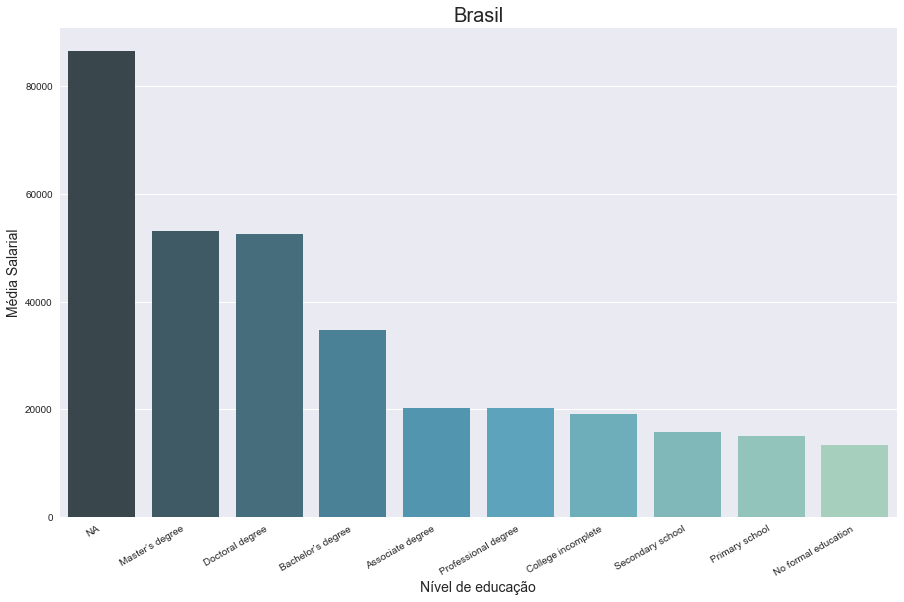

In [7]:
df_q1['EdLevel_'] = ['NA', 'Master’s degree', 'Doctoral degree', 'Bachelor’s degree', 'Associate degree', 
                     'Professional degree', 'College incomplete', 'Secondary school', 'Primary school', 'No formal education']
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(ax=ax, x='EdLevel_', y='ConvertedComp', data=df_q1, palette="GnBu_d")               
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax.set_xlabel('Nível de educação', fontsize=14)
ax.set_ylabel('Média Salarial', fontsize=14)
ax.set_title('Brasil', fontsize=20)
plt.show()

### Questão-02: Utilize o Power BI e o dataset das instruções do enunciado. Crie um gráfico para analisar o uso de mídia sociais (SocialMedia) em cada país. Qual a mídia social mais usada nos Estados Unidos? 

In [8]:
df_q2 = df.copy()
df_q2 = pd.DataFrame(df_q2.loc[df['Country'] == 'United States'].groupby(['Country', 'SocialMedia'])['SocialMedia'].count()
                     .sort_values( ascending=False)).rename(columns={'SocialMedia':'#SocialMedia'}).reset_index()
df_q2

,Country,SocialMedia,#SocialMedia
0,United States,Reddit,5700
1,United States,Twitter,3468
2,United States,Facebook,2844
3,United States,YouTube,2463
4,United States,I don't use social media,1851
5,United States,Instagram,1652
6,United States,LinkedIn,1020
7,United States,WhatsApp,609
8,United States,Snapchat,326
9,United States,WeChat 微信,93


C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20248 missing from c

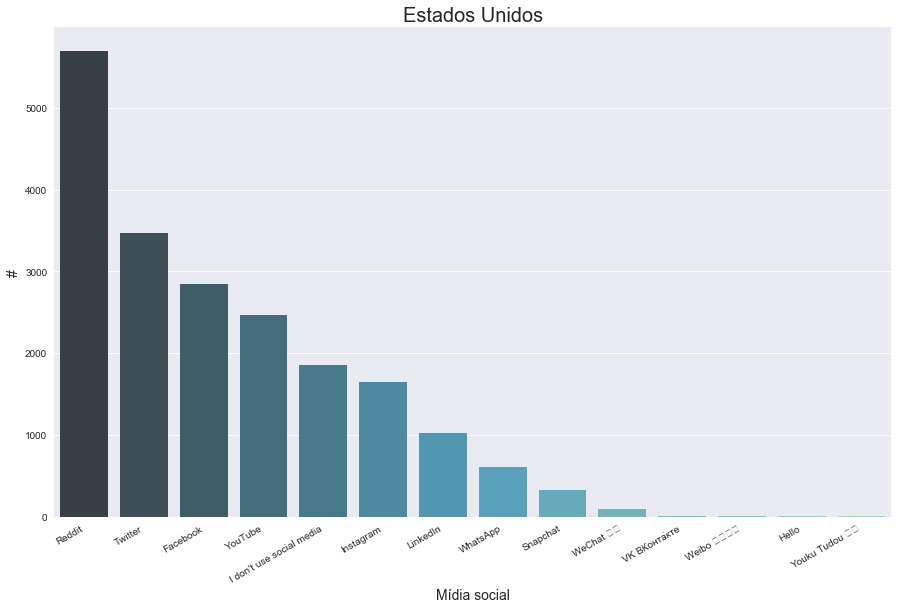

In [9]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(ax=ax, x='SocialMedia', y='#SocialMedia', data=df_q2, palette="GnBu_d")               
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax.set_xlabel('Mídia social', fontsize=14)
ax.set_ylabel('#', fontsize=14)
ax.set_title('Estados Unidos', fontsize=20)
plt.show()

Conforme é possível observar pela consulta, a mídia social mais utilizada nos <b>Estados Unidos</b> é o <b>Reddit</b>.

### Questão-03: Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Quantos empregados do departamento 5 trabalham mais de 10h por semana no projeto chamado "ProductX"? 

In [10]:
sql = '''
SELECT  pnome , unome, dnome, pjnome
FROM departamento AS de
INNER JOIN
projeto as pj
ON de.dnumero = pj.dnum
INNER JOIN
trabalha_em as te
On pj.pnumero = te.pno
INNER JOIN
empregado as em
on te.essn = em.ssn
WHERE de.dnumero = 5 AND 
      te.horas > 10 AND 
      pj.pjnome = 'ProductX'
'''

In [11]:
con=ConectionPostgre('localhost','IGTI','postgres','postgres123')
rs=con.consult(sql)
rs
print(f'O número de empregados do departamento 5 que trabalham mais de 10h por semana o projeto "ProductX" é: {len(rs)}')

O número de empregados do departamento 5 que trabalham mais de 10h por semana o projeto "ProductX" é: 2


### Questão-04: Utilize o Power BI e o dataset das instruções do enunciado. Crie um gráfico para analisar o uso de mídia sociais (SocialMedia). Filtrando por quem tem 20 anos de experiência ou mais (YearsCode), qual a Mídia Social mais usada no mundo inteiro? 

In [12]:
# Filtrando Mídia Social por YearsCode
df_q3 = df.copy()
df_q3 = pd.DataFrame(df_q3.groupby(['YearsCode', 'SocialMedia'])['SocialMedia'].count()
                     ).rename(columns={'SocialMedia':'#SocialMedia'}).reset_index()
df_q3['YearsCode'].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '6', '7', '8', '9', 'Less than 1 year',
       'More than 50 years'], dtype=object)

In [13]:
# Criando Coluna com versão númerica da YearsCode
df_q3['YearsCodeLabel'] = df_q3['YearsCode']
df_q3.loc[df_q3['YearsCodeLabel'] == 'Less than 1 year', 'YearsCodeLabel'] = 0.5
df_q3.loc[df_q3['YearsCodeLabel'] == 'More than 50 years', 'YearsCodeLabel'] = 51
df_q3['YearsCodeLabel'] = pd.to_numeric(df_q3['YearsCodeLabel'])
df_q3['YearsCodeLabel'].unique()

array([ 1. , 10. , 11. , 12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. ,
        2. , 20. , 21. , 22. , 23. , 24. , 25. , 26. , 27. , 28. , 29. ,
        3. , 30. , 31. , 32. , 33. , 34. , 35. , 36. , 37. , 38. , 39. ,
        4. , 40. , 41. , 42. , 43. , 44. , 45. , 46. , 47. , 48. , 49. ,
        5. , 50. ,  6. ,  7. ,  8. ,  9. ,  0.5, 51. ])

In [14]:
# Filtrando por YearsCode maior ou igual a 20 e ordenando decrescentemente
#df_q3.loc[df_q3['YearsCodeLabel'] >= 20].sort_values(by=['#SocialMedia'], ascending=False)
df_q3 = pd.DataFrame(df_q3.loc[df_q3['YearsCodeLabel'] >= 20].groupby(['SocialMedia'])['#SocialMedia'].sum()
                     .sort_values( ascending=False)).rename(columns={'SocialMedia':'#SocialMedia'}).reset_index()

df_q3

,SocialMedia,#SocialMedia
0,Twitter,3173
1,Facebook,2877
2,Reddit,2009
3,WhatsApp,1945
4,I don't use social media,1759
5,YouTube,1657
6,LinkedIn,1115
7,Instagram,620
8,WeChat 微信,60
9,VK ВКонта́кте,48


In [15]:
# Filtrando por YearsCode maior ou igual a 20 e ordenando decrescentemente


C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37239 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jorge\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28010 missing from c

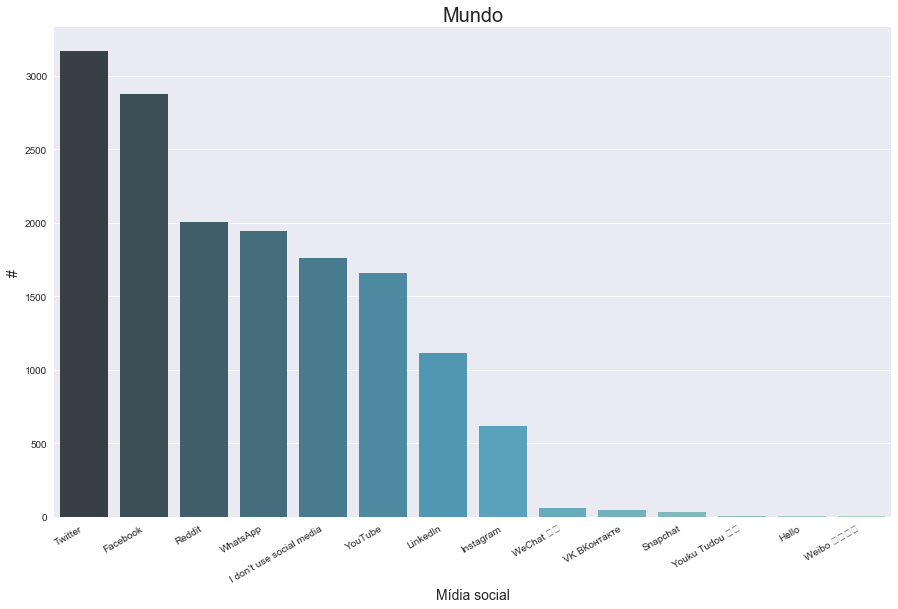

In [16]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(ax=ax, x='SocialMedia', y='#SocialMedia', data=df_q3, palette="GnBu_d")               
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax.set_xlabel('Mídia social', fontsize=14)
ax.set_ylabel('#', fontsize=14)
ax.set_title('Mundo', fontsize=20)
plt.show()

Conforme é possível observar pela consulta, a mídia social mais utilizada por quem possui 20 anos de experiência ou mais no mundo é o <b>Twitter</b>.

### Questão-05: Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Qual a média salarial nessa empresa? 

In [17]:
sql = '''
SELECT  AVG(salario) AS MEDIA
FROM empregado
'''

In [18]:
con=ConectionPostgre('localhost','IGTI','postgres','postgres123')
rs=con.consult(sql)
print(f'A média salarial desta empresa é: R${float(rs[0][0])}.')

A média salarial desta empresa é: R$35125.0.


### Questão-06: Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Quantos empregados possuem um dependente com o mesmo primeiro nome que o deles? 

In [19]:
sql = '''
SELECT  COUNT(ssn)
FROM empregado AS emp 
INNER JOIN 
dependente AS de 
ON emp.ssn = de.essn 
WHERE
emp.pnome = de.nome_dependente
GROUP BY emp.ssn
'''

In [20]:
con=ConectionPostgre('localhost','IGTI','postgres','postgres123')
rs=con.consult(sql)
rs

[]

<b>Nenhum</b> empregado possui um dependente com o mesmo primeiro nome que seu.

### Questão-07: Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Qual é a soma dos salários de todos os empregados do departamento chamado 'Research'? 

In [21]:
sql = '''
SELECT  SUM(salario) AS Soma
FROM empregado AS em
INNER JOIN
departamento as dep
ON em.dno = dep.dnumero
WHERE
dep.dnome = 'Research'
'''

In [22]:
con=ConectionPostgre('localhost','IGTI','postgres','postgres123')
rs=con.consult(sql)
print(f'A soma dos salarios dos empregados do departamento "Research" é: R${float(rs[0][0])}.')

A soma dos salarios dos empregados do departamento "Research" é: R$133000.0.


### Questão-08: Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico de colunas com a média de salário (ConvertedComp) por nível de satisfação (CareerSat), filtrando os dados do Chile, como fica o gráfico? 

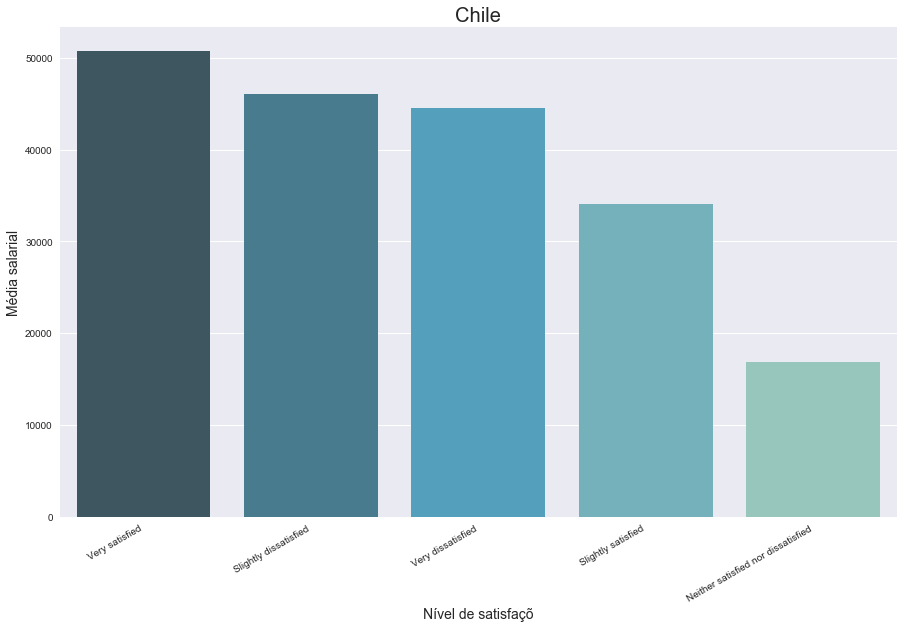

In [23]:
df_q8 = pd.DataFrame(df.copy().loc[df['Country'] == 'Chile'].groupby('CareerSat')['ConvertedComp']
                     .mean().sort_values(ascending=False)).reset_index()

fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(ax=ax, x='CareerSat', y='ConvertedComp', data=df_q8, palette="GnBu_d")               
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax.set_xlabel('Nível de satisfaçõ', fontsize=14)
ax.set_ylabel('Média salarial', fontsize=14)
ax.set_title('Chile', fontsize=20)
plt.show()

### Questão-09: Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Qual seria o custo do projeto com folha salarial (soma de todos os salários), caso a empresa desse 10% de aumento para todos os empregados que trabalham no projeto 'ProductX'? 

In [24]:
sql = '''
SELECT  SUM(salario) * 1.1 AS Soma
FROM empregado AS em
INNER JOIN
trabalha_em as te
ON em.ssn = te.essn
INNER JOIN
projeto As pj
ON te.pno = pj.pnumero
WHERE
pj.pjnome = 'ProductX'
'''

In [25]:
con=ConectionPostgre('localhost','IGTI','postgres','postgres123')
rs=con.consult(sql)
print(f'A soma dos salarios dos empredados do departamento "Research" é: R${float(rs[0][0])}.')

A soma dos salarios dos empredados do departamento "Research" é: R$60500.0.


### Questão-10: Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Quem é a pessoa que possui mais tempo de alocação no projeto 'Newbenefits'? 

In [26]:
sql = '''
SELECT  pnome, horas
FROM empregado AS em
INNER JOIN
trabalha_em as te
ON em.ssn = te.essn
INNER JOIN
projeto As pj
ON te.pno = pj.pnumero
WHERE
pj.pjnome = 'Newbenefits'
ORDER BY te.horas DESC
'''

In [27]:
con=ConectionPostgre('localhost','IGTI','postgres','postgres123')
rs=con.consult(sql)
print(f'A pessoa que possui mais tempo de alocação no projeto "Newbenefits" é a {rs[0][0]} com {rs[0][1]} horas alocadas.')

A pessoa que possui mais tempo de alocação no projeto "Newbenefits" é a Alicia com 30.0 horas alocadas.


### Questão-11: Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Quais os nomes de todos os empregados que são diretamente supervisionados por Franklin Wong? 

In [28]:
sql = '''
SELECT  em.pnome
FROM empregado AS em, empregado AS sp
WHERE em.superssn = sp.ssn AND
      sp.pnome = 'Franklin' AND
      sp.unome = 'Wong'
'''

In [29]:
con=ConectionPostgre('localhost','IGTI','postgres','postgres123')
rs=con.consult(sql)
print(f'Os empregados que são diretamente supervisionados por Franklin Wong são {rs[0][0]} e {rs[1][0]}.')

Os empregados que são diretamente supervisionados por Franklin Wong são Joyce e Ramesh.


### Questão-12: Utilize o Power BI e o dataset das instruções do enunciado. Crie um gráfico para analisar o uso de mídia sociais (SocialMedia) em cada país. Qual a mídia social mais usada no Brasil? 

In [30]:
df_q12 = pd.DataFrame(df.copy().loc[df['Country'] == 'Brazil'].groupby(['Country', 'SocialMedia'])['SocialMedia'].count()
                     .sort_values(ascending=False)).rename(columns={'SocialMedia':'#SocialMedia'}).reset_index()
df_q12

,Country,SocialMedia,#SocialMedia
0,Brazil,WhatsApp,624
1,Brazil,YouTube,294
2,Brazil,Twitter,262
3,Brazil,Instagram,212
4,Brazil,Facebook,195
5,Brazil,Reddit,169
6,Brazil,LinkedIn,85
7,Brazil,I don't use social media,55


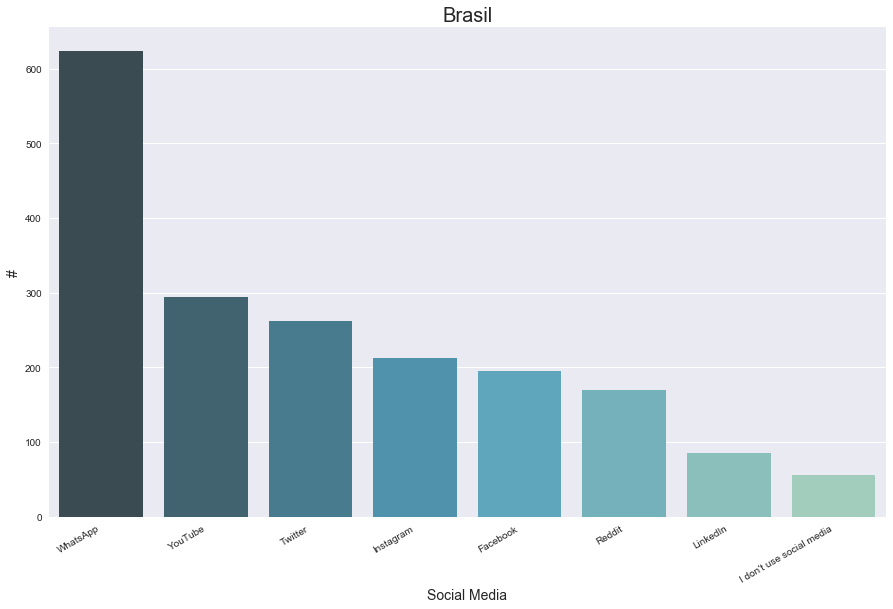

In [31]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(ax=ax, x=df_q12['SocialMedia'], y=df_q12['#SocialMedia'], data=df_q12, palette="GnBu_d")               
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax.set_xlabel('Social Media', fontsize=14)
ax.set_ylabel('#', fontsize=14)
ax.set_title('Brasil', fontsize=20)
plt.show()

Conforme é possível observar pela consulta, a mídia social mais utilizada nos <b>Brasil</b> é o <b>WhatsApp</b>.

### Questão-13: Utilize o Power BI e o dataset das instruções do enunciado. Crie um gráfico de dispersão com o tempo de experiência (YearsCode) e o salário (ConvertedComp). Crie um filtro para exibir os registros de quem possui mais que 5 anos e menos que 30 anos de experiência. Como fica o gráfico?

### <span style="color:red">QUESTÃO ANULADA</span>


In [32]:
df_q13 = df.copy()
# Dropping nan rows
# Criando Coluna com versão númerica da YearsCode
df_q13['YearsCode'].fillna(0, inplace=True)
df_q13['YearsCodeLabel'] = df_q13['YearsCode']
df_q13.loc[df_q13['YearsCodeLabel'] == 'Less than 1 year', 'YearsCodeLabel'] = 0.5
df_q13.loc[df_q13['YearsCodeLabel'] == 'More than 50 years', 'YearsCodeLabel'] = 51
df_q13['YearsCodeLabel'] = pd.to_numeric(df_q13['YearsCodeLabel'])

In [33]:
#df_q13 = pd.DataFrame(df_q13.loc[(df_q13['YearsCodeLabel'] > 5) & (df_q13['YearsCodeLabel'] < 30)].groupby('YearsCodeLabel')).reset_index()

In [34]:
df_q13 = pd.DataFrame(df_q13.loc[(df_q13['YearsCodeLabel'] > 5) & (df_q13['YearsCodeLabel'] < 30)]
                     ).reset_index().sort_values(by=['ConvertedComp'], ascending=False)

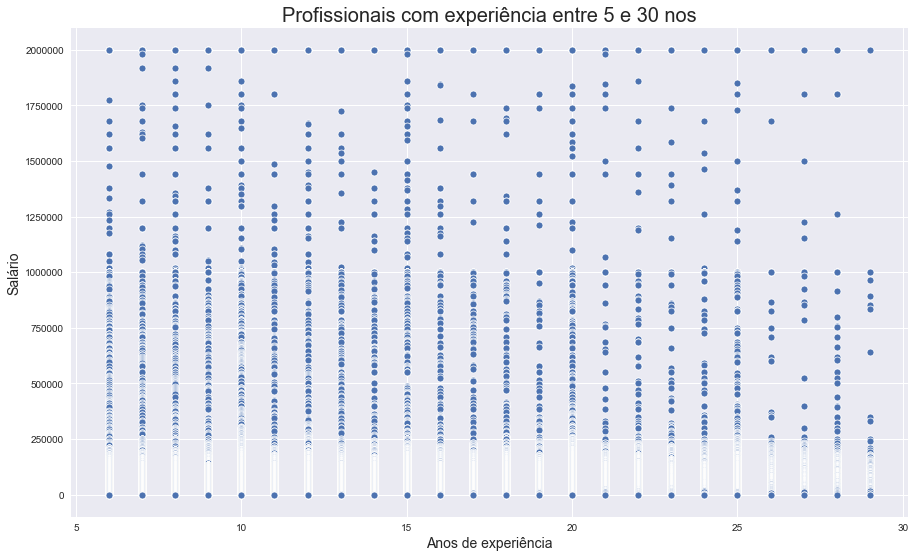

In [35]:
fig, ax = plt.subplots(figsize=(15,9))
sns.scatterplot(ax=ax, x='YearsCodeLabel', y='ConvertedComp', data=df_q13)           
ax.set_xlabel('Anos de experiência', fontsize=14)
ax.set_ylabel('Salário', fontsize=14)
ax.set_title('Profissionais com experiência entre 5 e 30 nos', fontsize=20)
plt.show()

### Questão-14: Utilize o Power BI e o dataset das instruções do enunciado. Crie um gráfico para analisar o nível de formação dos desenvolvedores (EdLevel). Aplicando um filtro que remove apenas os registros dos Estados Unidos, qual é o país com maior número de desenvolvedores que nunca tiveram uma educação formal? 

In [36]:
df_q14 = df.copy()
df_q14 = pd.DataFrame(df_q14.loc[(df_q14['Country'] != 'United States') & 
                                 (df_q14['EdLevel'] == 'I never completed any formal education')]
                      .groupby(['Country','EdLevel'])['EdLevel'].count()
                     ).rename(columns={'EdLevel':'#EdLevel'}).reset_index().sort_values(by=['#EdLevel'], ascending=False)
df_q14

,Country,EdLevel,#EdLevel
34,India,I never completed any formal education,49
84,United Kingdom,I never completed any formal education,27
15,Canada,I never completed any formal education,19
29,Germany,I never completed any formal education,18
39,Israel,I never completed any formal education,16
...,...,...,...
24,Estonia,I never completed any formal education,1
56,Nigeria,I never completed any formal education,1
25,Ethiopia,I never completed any formal education,1
26,Fiji,I never completed any formal education,1


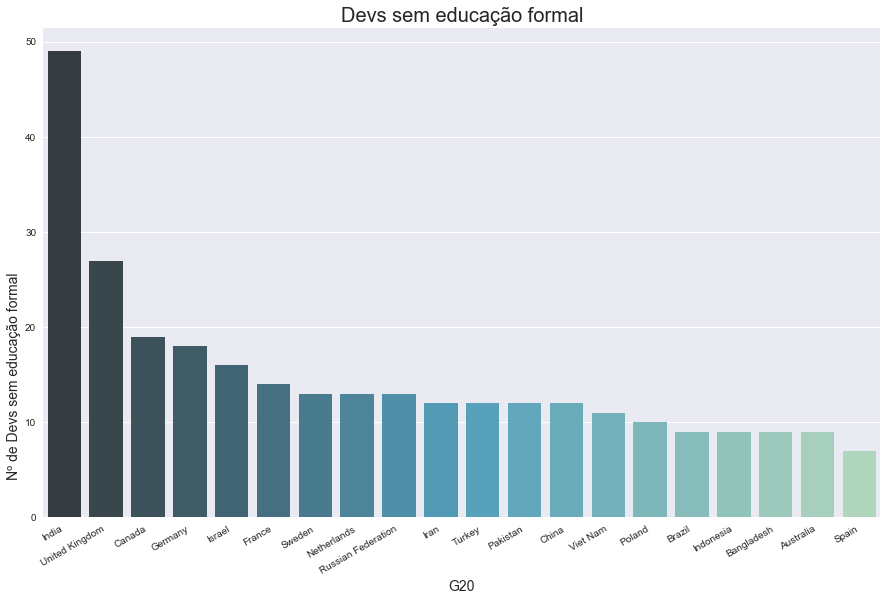

In [37]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(ax=ax, x=df_q14['Country'][:20], y=df_q14['#EdLevel'][:20], data=df_q14, palette="GnBu_d")               
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax.set_xlabel('G20', fontsize=14)
ax.set_ylabel('Nº de Devs sem educação formal', fontsize=14, horizontalalignment= 'right')
ax.set_title('Devs sem educação formal', fontsize=20)
plt.show()

O país com maior número de desenvolvedores que nunca tiveram uma educação formal é a <b>Índia</b>.

### Questão-15: Considere o banco de dados do enunciado. Crie uma consulta em SQL e responda: Qual o nome do departamento com a menor média de salário entre seus funcionários?

In [38]:
sql = '''
SELECT  dnome, AVG(salario) AS Média
FROM departamento AS de
INNER JOIN
projeto as pj
ON de.dnumero = pj.dnum
INNER JOIN
trabalha_em as te
On pj.pnumero = te.pno
INNER JOIN
empregado as em
on te.essn = em.ssn
GROUP By de.dnome
ORDER BY Média ASC
'''

In [39]:
con=ConectionPostgre('localhost','IGTI','postgres','postgres123')
rs=con.consult(sql)
print(f'O departamento com a menor média de salário entre seus funcionários e o "{rs[0][0]}"'
      f' com a média salarial de R${rs[0][1]:.2f}.')

O departamento com a menor média de salário entre seus funcionários e o "Administration" com a média salarial de R$30500.00.
